In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
X,y=make_blobs(n_samples=1000,centers=3,n_features=2,random_state=23)

In [8]:
X.shape

(1000, 2)

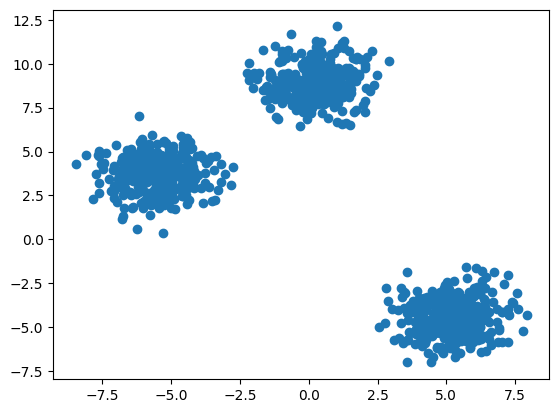

In [9]:
plt.scatter(X[:,0],X[:,1])

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42
)

In [11]:
from sklearn.cluster import KMeans

## manual process 
## Elbow method to the K value

WCSS=[]
for k in range(1,11):
    kmeans=KMeans(n_clusters=k,init='k-means++')
    kmeans.fit(X_train)
    WCSS.append(kmeans.inertia_)

In [12]:
WCSS

[34827.57682552021,
 7935.437286145418,
 1319.2730531585607,
 1173.9073331598556,
 1033.364590474413,
 916.3968704111005,
 777.3426266957426,
 736.5300208632384,
 625.063477086515,
 545.4037452789628]

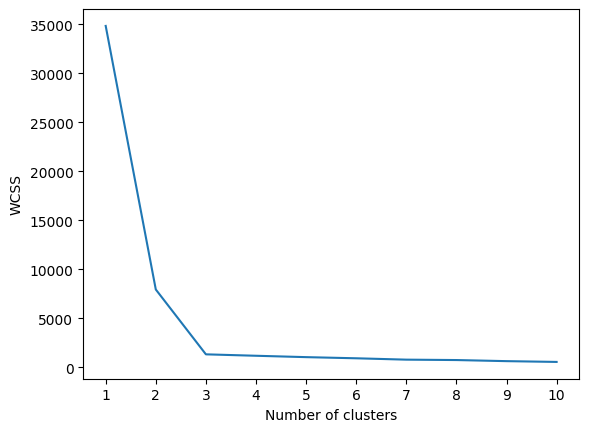

In [13]:
## plot elbow curve
plt.plot(range(1,11),WCSS)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

In [14]:
kmeans=KMeans(n_clusters=3,init="k-means++")
y_labels=kmeans.fit_predict(X_train)

In [15]:
y_test_label=kmeans.predict(X_test)

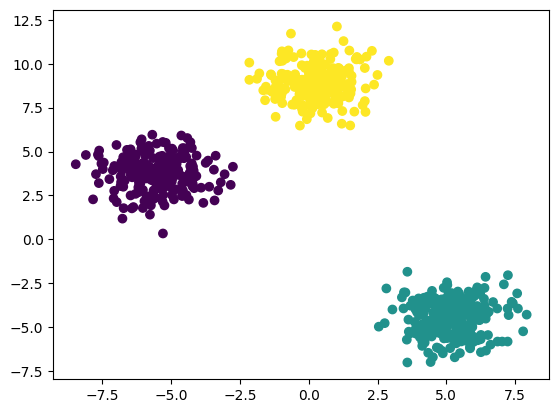

In [16]:
plt.scatter(X_train[:,0],X_train[:,1],c=y_labels)

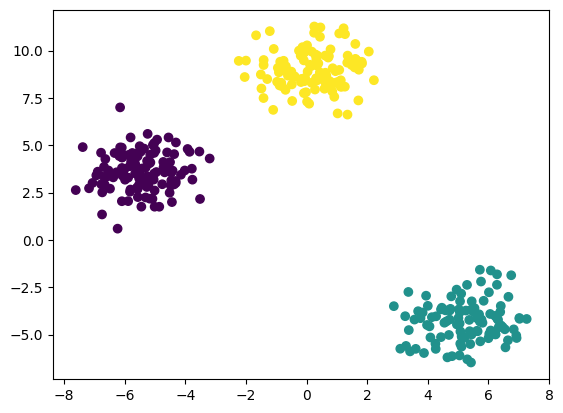

In [17]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_test_label)

In [19]:
from kneed import KneeLocator

In [20]:
k1=KneeLocator(range(1,11),WCSS,curve='convex',direction='decreasing')
k1.elbow

np.int64(3)

In [21]:
## performance metrics
## siLhoutte score
from sklearn.metrics import silhouette_score

In [22]:
silhouette_coefficients=[]
for k in range(2,11):
    kmeans=KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train)
    score=silhouette_score(X_train,kmeans.labels_)
    silhouette_coefficients.append(score)
    

In [23]:
silhouette_coefficients

[np.float64(0.7281443868598331),
 np.float64(0.8071181203797672),
 np.float64(0.6517032201224287),
 np.float64(0.49452925620179905),
 np.float64(0.3259236493459803),
 np.float64(0.46689016421866786),
 np.float64(0.3466595461943025),
 np.float64(0.32598214739756787),
 np.float64(0.34347739065195965)]

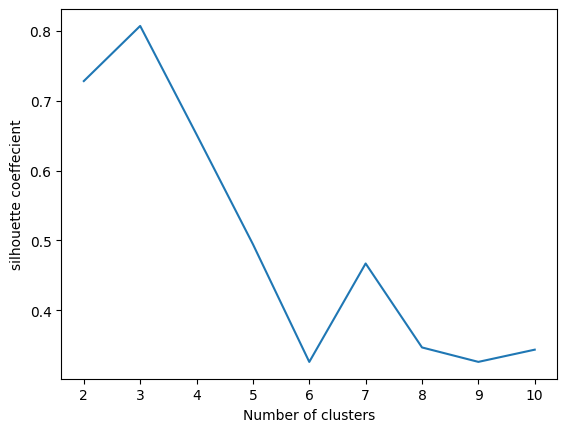

In [24]:
## plotting silhouette score
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhouette coeffecient")
plt.show()

Hierarichal clustering implementation

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets

In [26]:
iris=datasets.load_iris()

In [27]:
iris_data=pd.DataFrame(iris.data)

In [28]:
iris_data.columns=iris.feature_names

In [29]:
iris_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [31]:
X_scaled=scaler.fit_transform(iris_data)

In [32]:
X_scaled

array([[-9.00681170e-01,  1.01900435e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00, -1.31979479e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.38535265e+00,  3.28414053e-01, -1.39706395e+00,
        -1.31544430e+00],
       [-1.50652052e+00,  9.82172869e-02, -1.28338910e+00,
        -1.31544430e+00],
       [-1.02184904e+00,  1.24920112e+00, -1.34022653e+00,
        -1.31544430e+00],
       [-5.37177559e-01,  1.93979142e+00, -1.16971425e+00,
        -1.05217993e+00],
       [-1.50652052e+00,  7.88807586e-01, -1.34022653e+00,
        -1.18381211e+00],
       [-1.02184904e+00,  7.88807586e-01, -1.28338910e+00,
        -1.31544430e+00],
       [-1.74885626e+00, -3.62176246e-01, -1.34022653e+00,
        -1.31544430e+00],
       [-1.14301691e+00,  9.82172869e-02, -1.28338910e+00,
        -1.44707648e+00],
       [-5.37177559e-01,  1.47939788e+00, -1.28338910e+00,
        -1.31544430e+00],
       [-1.26418478e+00,  7.88807586e-01, -1.22655167e+00,
      

In [33]:
X_scaled.shape

(150, 4)

In [34]:
from sklearn.decomposition import PCA

In [35]:
pca=PCA(n_components=2)

In [36]:
pca

PCA(n_components=2)

In [37]:
pca_scaled=pca.fit_transform(X_scaled)

In [38]:
pca_scaled.shape

(150, 2)

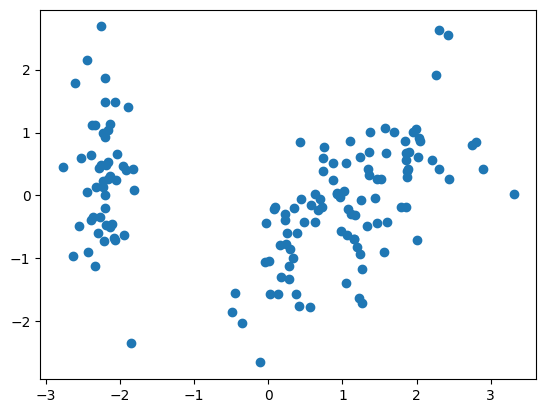

In [39]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1])

Text(0, 0.5, 'Euclidean Distance')

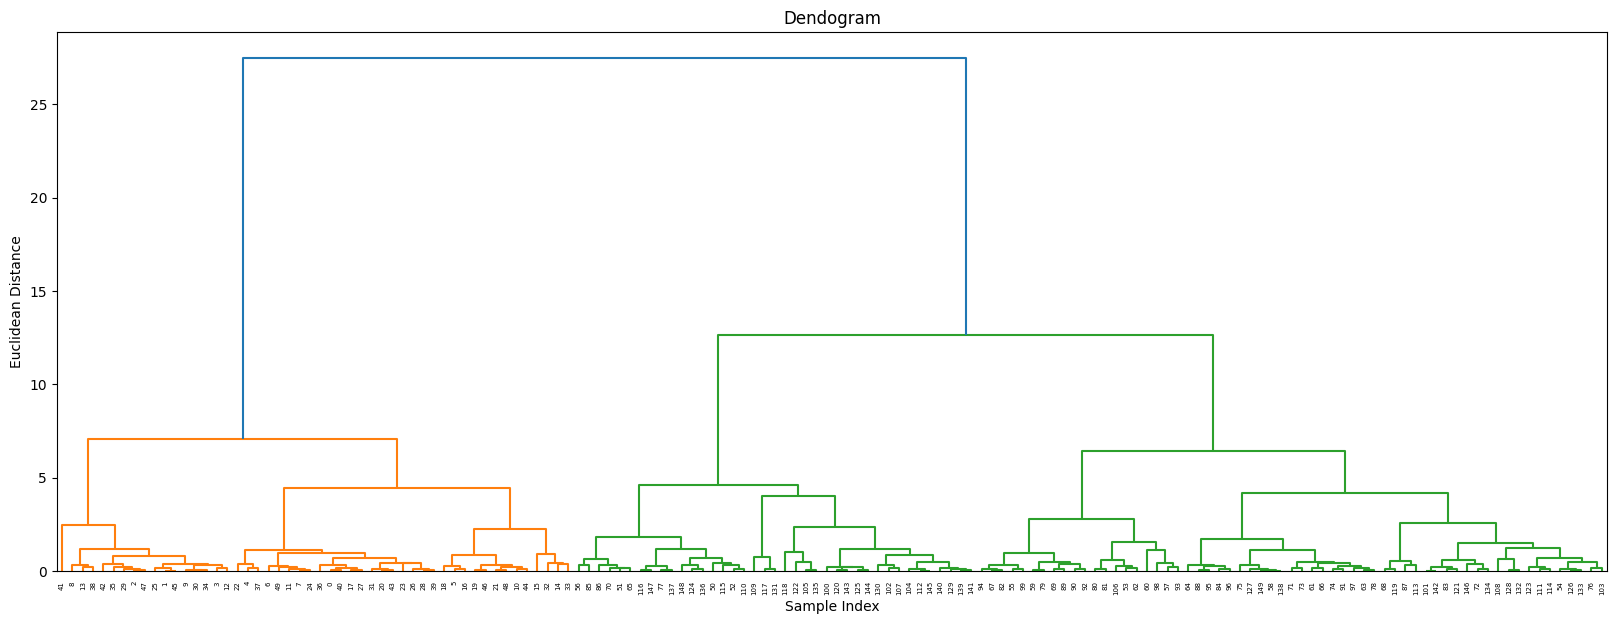

In [40]:
import scipy.cluster.hierarchy as sc
plt.figure(figsize=(20,7))
plt.title("Dendograms")
sc.dendrogram(sc.linkage(pca_scaled,method='ward'))
plt.title('Dendogram')
plt.xlabel('Sample Index')
plt.ylabel('Euclidean Distance')

In [42]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=2,metric='euclidean',linkage='ward')
cluster.fit(pca_scaled)

AgglomerativeClustering()

In [43]:
cluster.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

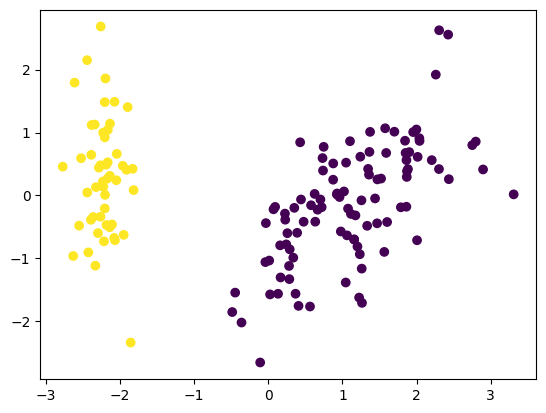

In [44]:
plt.scatter(pca_scaled[:,0],pca_scaled[:,1],c=cluster.labels_)

In [46]:
from sklearn.metrics import silhouette_score

In [51]:
silhouette_coefficients=[]
for k in range(2, 11):
    agglo = AgglomerativeClustering(n_clusters=k,metric='euclidean',linkage='ward')
    agglo.fit(X_scaled)
    score = silhouette_score(X_scaled, agglo.labels_)
    silhouette_coefficients.append(score)

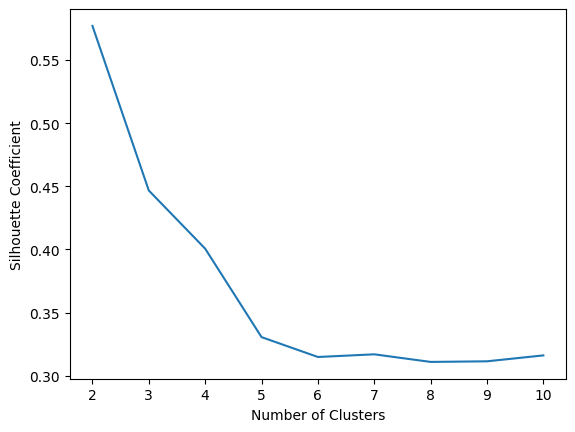

In [52]:
plt.plot(range(2,11),silhouette_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Coefficient")
plt.show()